# Computer Vision - P2

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 24th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scipy import ndimage
from scipy.signal import convolve2d
from skimage import data, exposure, color, feature, filters, io, img_as_float, transform, util, img_as_ubyte
from skimage.color import rgb2gray, rgba2rgb
from skimage.filters import roberts, prewitt, sobel, sobel_h, sobel_v,  gaussian, median
from skimage.transform import rescale, resize
from skimage.feature import canny

import numpy as np

C:\Users\pedro\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def viewFigure(images, titles):

    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15,15)

    #For each image
    for i in range(len(images)):

        x[i].imshow(images[i])#Set the image
        x[i].set_title(titles[i])#Set the title
        x[i].axis('off')#Set the axis off

    #Show all the images
    plt.show()
#Print the list of images in a figure with out axis
def viewFigureGray(images, titles):

    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15,15)

    #For each image
    for i in range(len(images)):

        x[i].imshow(images[i],'gray')#Set the image
        x[i].set_title(titles[i])#Set the title
        x[i].axis('off')#Set the axis off

    #Show all the images
    plt.show()
    
#Show the shape, the type, the min max value of a image
def showDim(img):
    print("SHAPE: " + str(img.shape))
    print("DTYPE: " + str(img.dtype))
    print("MAX VALUE: " + str(img.max()))
    print("MIN VALUE: " + str(img.min()) + "\n")

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

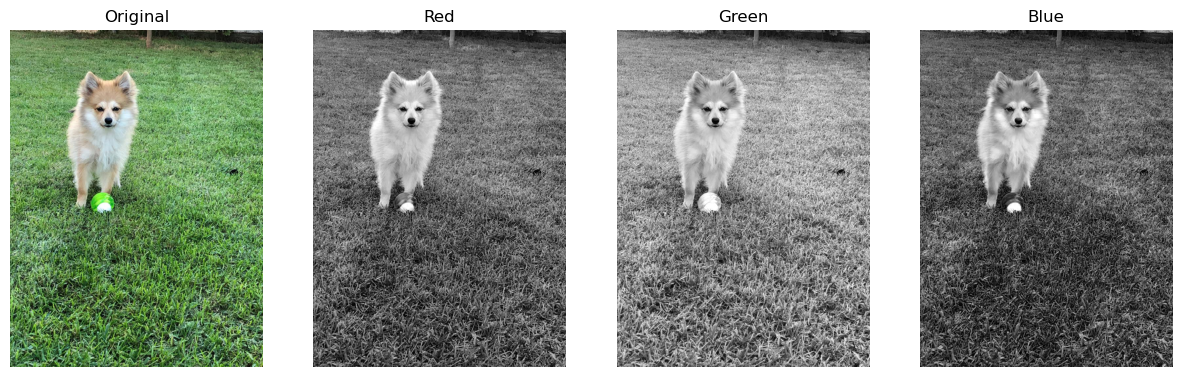

In [3]:
rocki = io.imread('./images_notebook/rocki.jpeg')
red = rocki[:,:,0] #Red chanel
green = rocki[:,:,1] #Green chanel
blue = rocki[:,:,2] #Blue chanel

#Show images
images = [rocki, red, green, blue]
titles = ['Original', 'Red', 'Green', 'Blue']
viewFigureGray(images, titles)

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

In [4]:
from skimage.exposure import histogram
def im_hist(im,  nbins=8): 
    hist_gray, bins_gray = histogram(img_as_float(rgb2gray(im)), nbins)
    hist_r, bins_r = histogram(img_as_float(im[:,:, 0]), nbins)
    hist_g, bins_g = histogram(img_as_float(im[:,:, 1]), nbins)
    hist_b, bins_b = histogram(img_as_float(im[:,:, 2]), nbins)

    x = np.arange(nbins)

    fig = plt.figure(figsize = (15, 10))
    cl_gray = plt.bar(x, hist_gray, 0.1, color = 'orange')
    cl_r = plt.bar(x+0.1, hist_r,0.1, color='red')
    cl_g = plt.bar(x+0.2, hist_g,0.1, color='green')
    cl_b = plt.bar(x+0.3, hist_b,0.1, color='blue')
    plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc=1, prop={'size': 10})

    plt.title('Histogram with 8 nbins')
    plt.show()


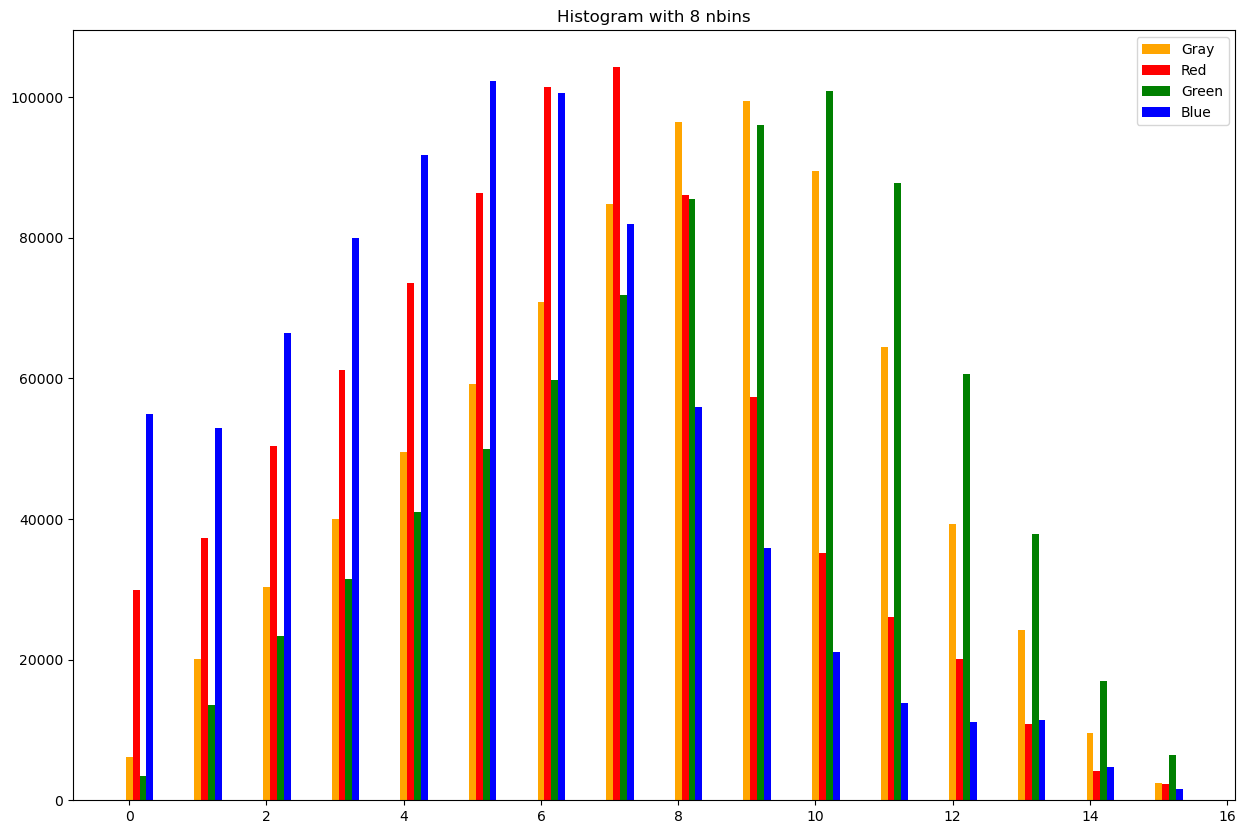

In [5]:
im_hist(rocki, 16)

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


In [6]:
# Load and reshape the image
rocki = io.imread('./images_notebook/rocki.jpeg')
# Resize to 256x256 pixels
rocki = transform.resize(rocki, (256, 256), anti_aliasing=True)

# Convert to grayscale
rocki_gray = color.rgb2gray(rocki)

# Define the horizontal mask
mask_h1d = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

# Normalize the mask
mask_h1d = mask_h1d / mask_h1d.sum()

# Convolve with the horizontal mask
convolved_1 = ndimage.convolve(rocki_gray, mask_h1d)

# Transpose the mask
mask_h1d_transposed = mask_h1d.T

# Convolve with the transposed mask
convolved_2 = ndimage.convolve(rocki_gray, mask_h1d_transposed)

# Define the uniform 15x15 mask
mask_uniform = np.ones((15, 15))

# Normalize the mask
mask_uniform = mask_uniform / mask_uniform.sum()

# Convolve with the uniform mask
convolved_3 = ndimage.convolve(rocki_gray, mask_uniform)

# Show the dimensions, type, max, and min values of the images
showDim(rocki_gray)
showDim(convolved_1)
showDim(convolved_2)
showDim(convolved_3)

SHAPE: (256, 256)
DTYPE: float64
MAX VALUE: 0.9981931422608258
MIN VALUE: 0.023370525962052073

SHAPE: (256, 256)
DTYPE: float64
MAX VALUE: 0.9567911829295046
MIN VALUE: 0.09166521827204707

SHAPE: (256, 256)
DTYPE: float64
MAX VALUE: 0.9251687125473449
MIN VALUE: 0.08496635640179083

SHAPE: (256, 256)
DTYPE: float64
MAX VALUE: 0.8511120673037093
MIN VALUE: 0.13497638889196895



b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


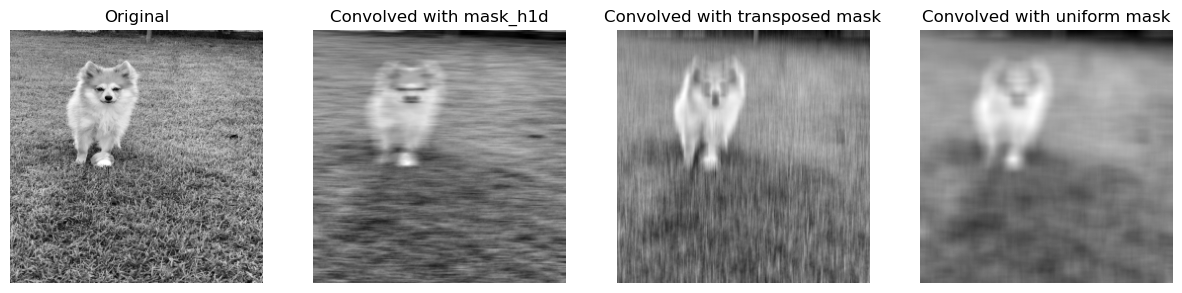

In [7]:
#Show images
# Visualize the results
viewFigureGray([rocki_gray, convolved_1, convolved_2, convolved_3],
              ['Original', 'Convolved with mask_h1d', 'Convolved with transposed mask', 'Convolved with uniform mask'])

c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


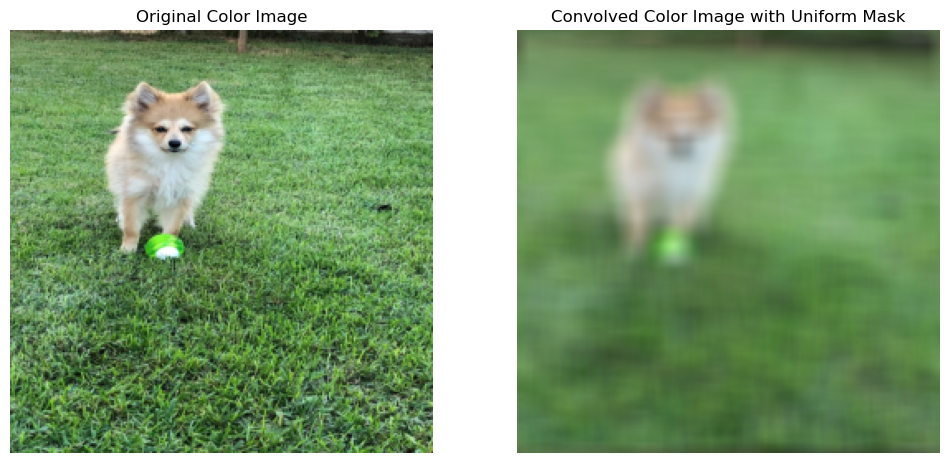

In [8]:
def conv_color(image, mask):
    result = np.zeros_like(image)

    for channel in range(3):
        result[:, :, channel] = convolve2d(image[:, :, channel], mask, mode='same', boundary='wrap')

    return result

# Load the color image
rocki_color = io.imread('./images_notebook/rocki.jpeg')

# Resize the image to 256x256 pixels
rocki_color = transform.resize(rocki_color, (256, 256), anti_aliasing=True)

# Define a uniform 15x15 mask
mask_uniform = np.ones((15, 15)) / 225  # Normalize the mask

# Apply the convolution
convolved_color = conv_color(rocki_color, mask_uniform)

# Display the original and convolved color images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rocki_color)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_color)
plt.title('Convolved Color Image with Uniform Mask')
plt.axis('off')

plt.show()

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


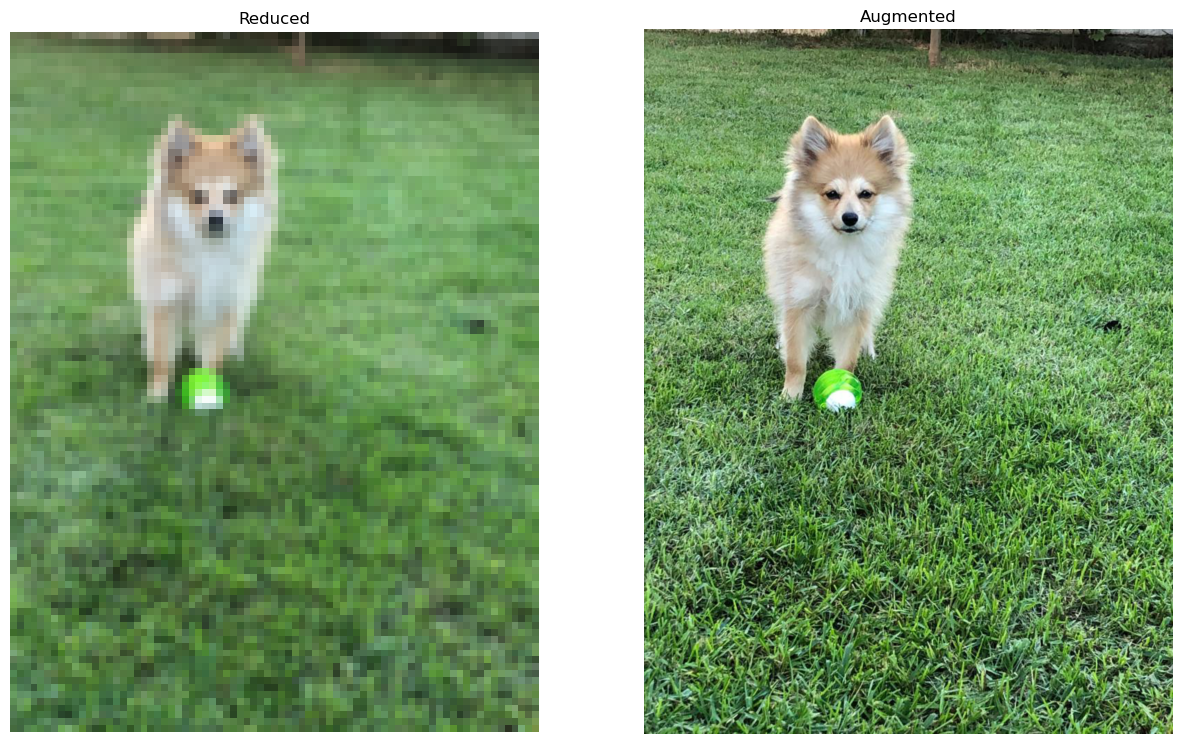

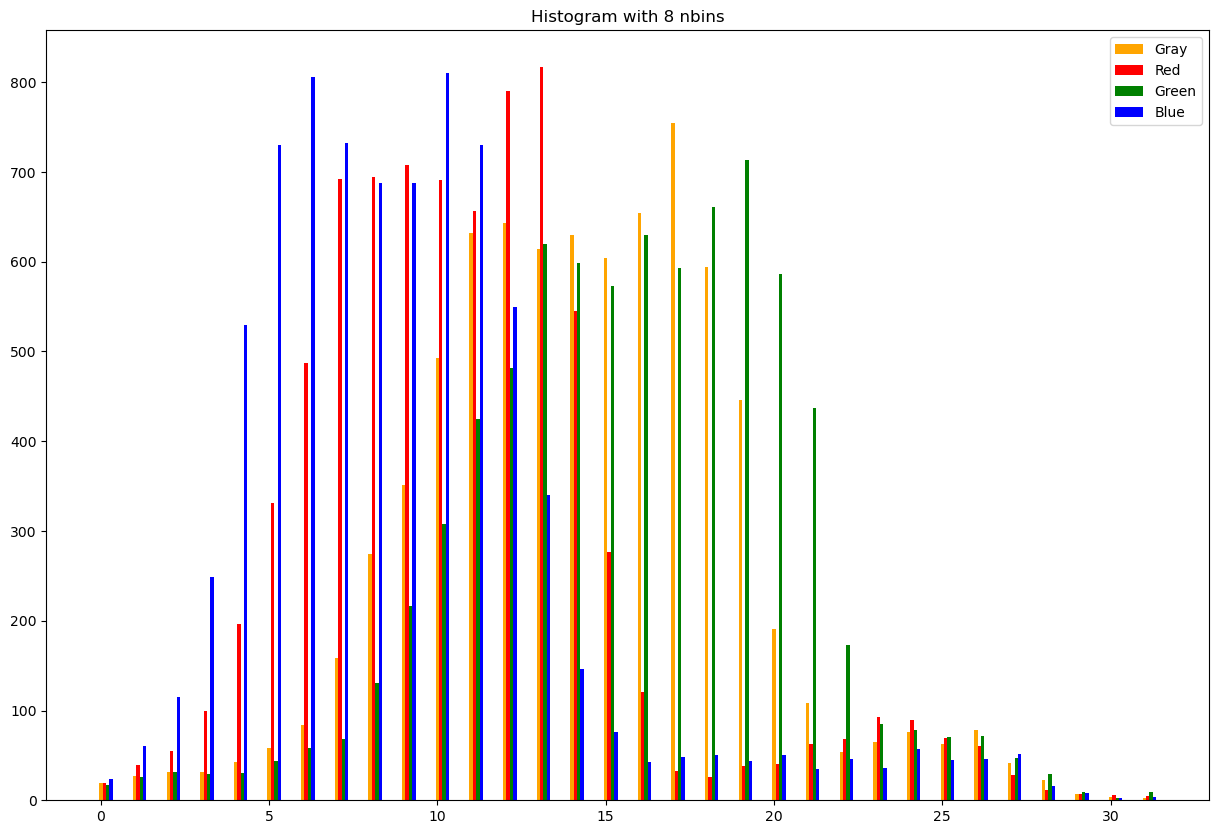

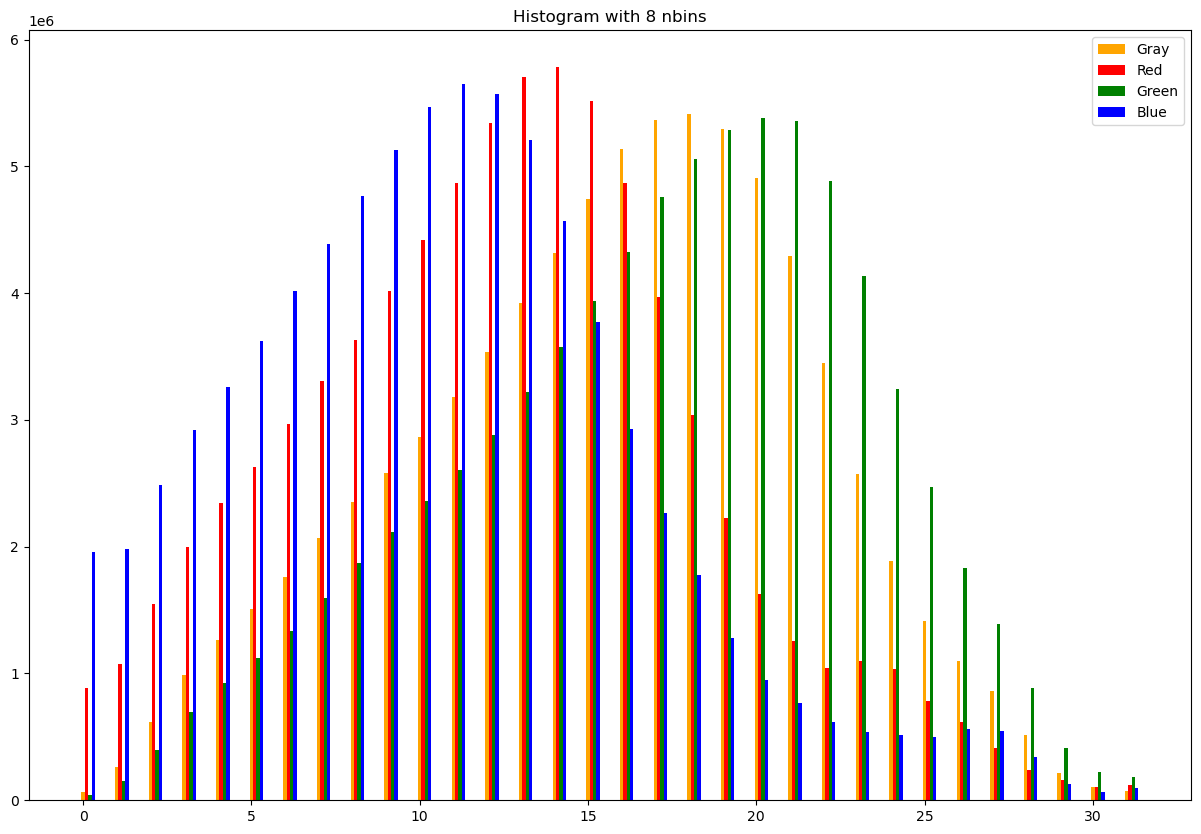

In [9]:
#your solution
rocki = io.imread('./images_notebook/rocki.jpeg')
#rocki = rgba2rgb(rocki )

#Rocki image reduced x10 columns and rows
reduced = resize(rocki,(round(rocki.shape[0]/10), round(rocki.shape[1]/10)))

#Rocki image augmented x10 columns and rows
augmented = resize(rocki,(round(rocki.shape[0]*10), round(rocki.shape[1]*10)))
#Show images
images = [reduced, augmented]
titles = ["Reduced", "Augmented"]
viewFigure(images, titles)

im_hist(reduced,  32) 
im_hist(augmented,  32)

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


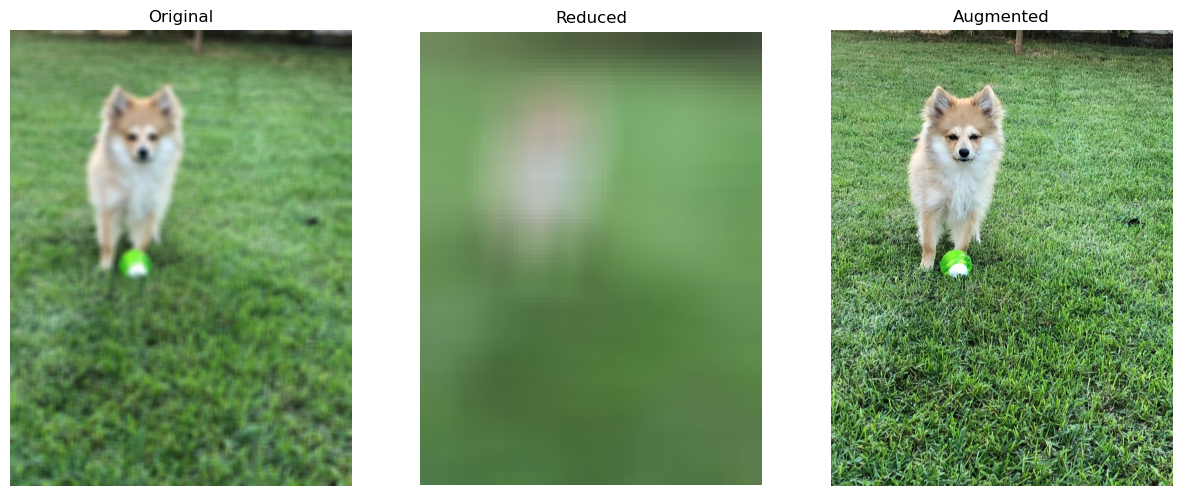

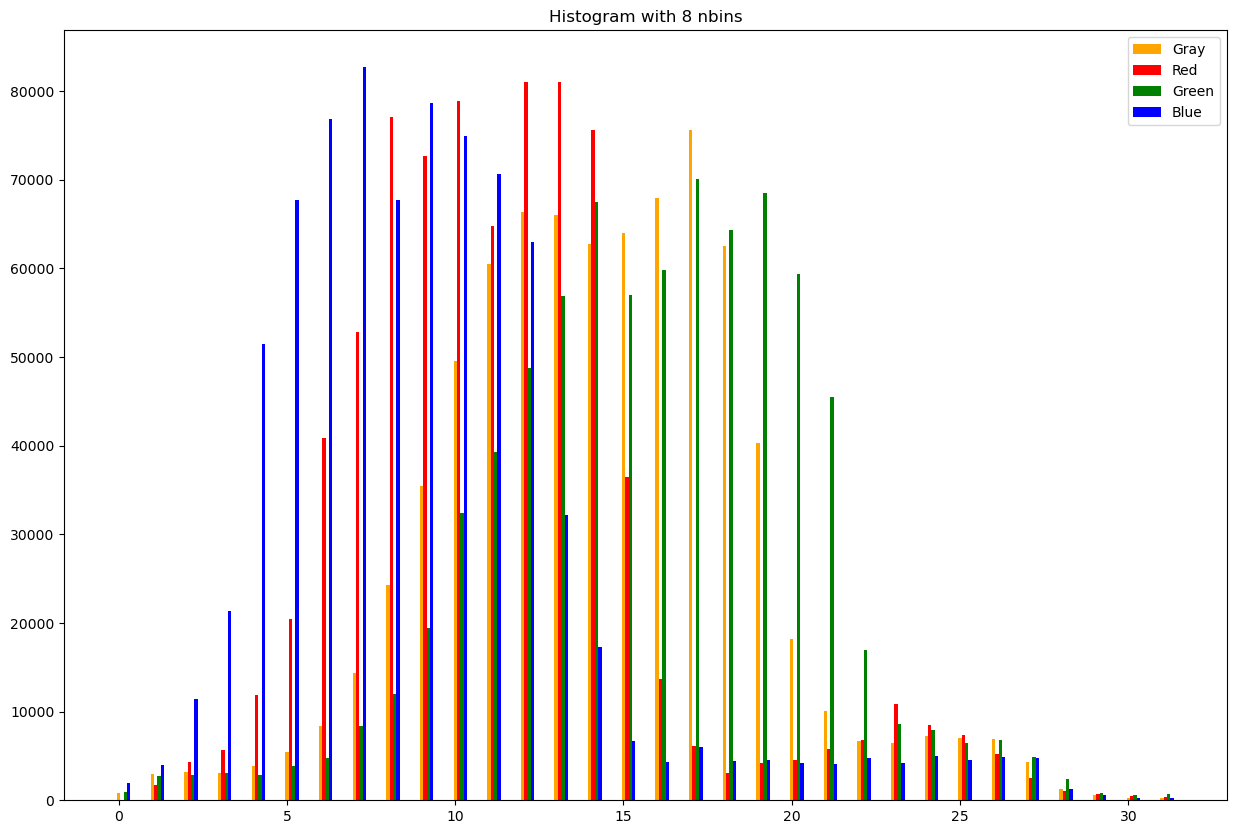

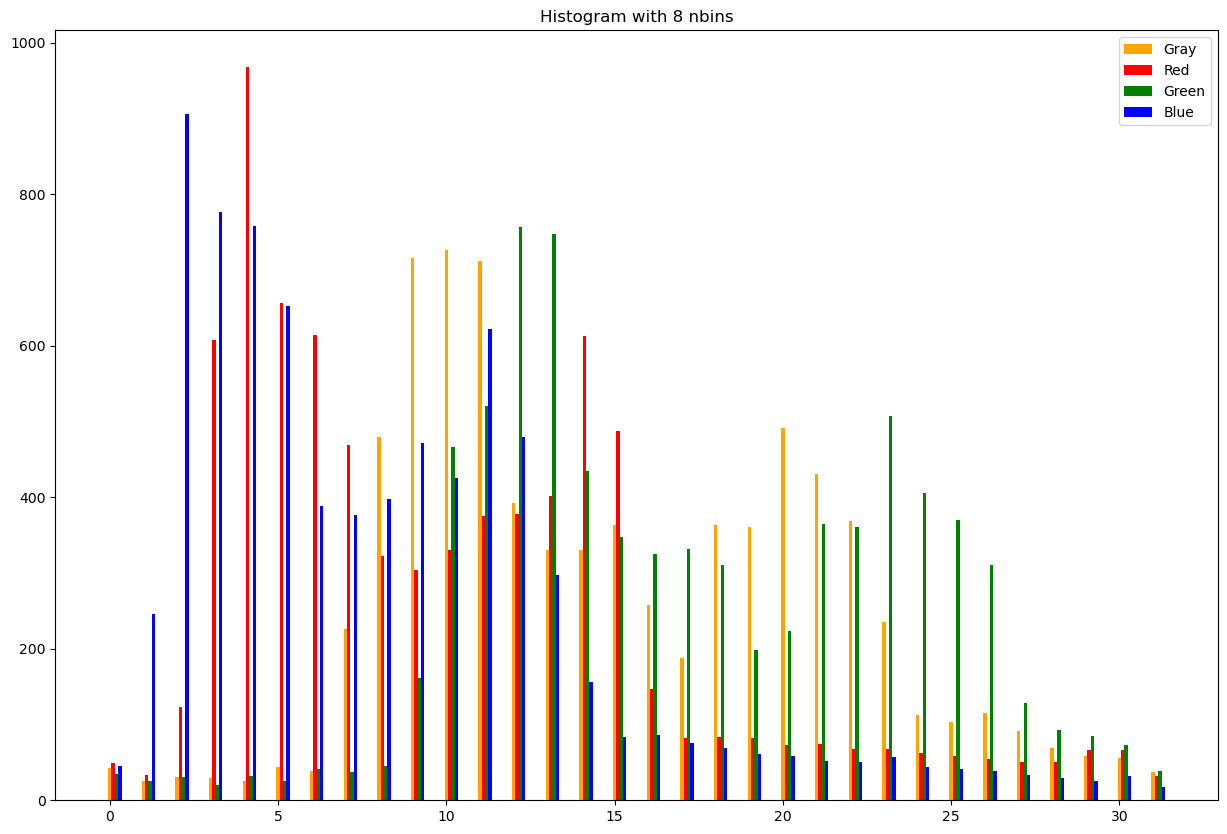

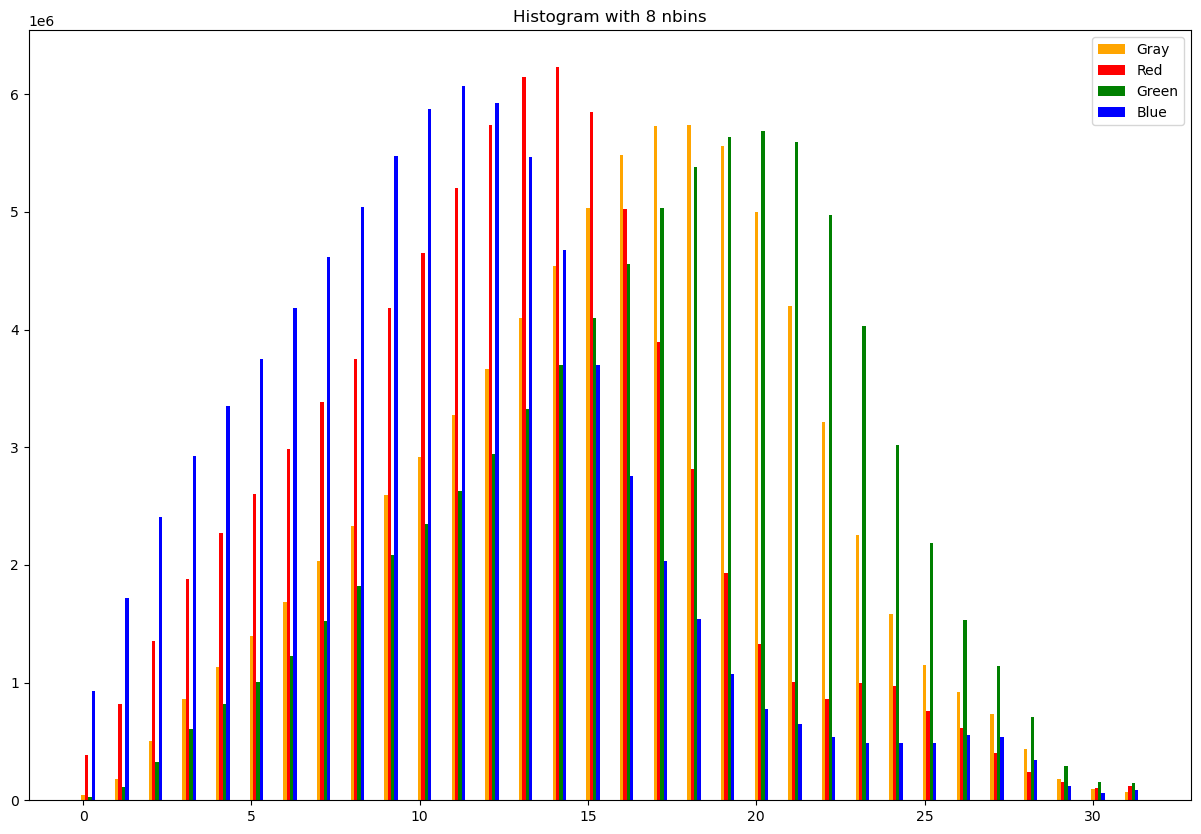

In [10]:
#your solution
reduced = img_as_float(reduced)
augmented = img_as_float(augmented)

mask = np.ones((15, 15)) / sum(np.ones((15, 15)))
mask /= np.sum(mask)

convolved_orig = np.copy(rocki)
convolved_red = np.copy(reduced)
convolved_aug = np.copy(augmented)
for j in range(10):
    for i in range(3):
        convolved_orig[:, :, i] = ndimage.convolve(rocki[:, :, i], mask)
        convolved_red[:, :, i] = ndimage.convolve(reduced[:,:,i], mask)
        convolved_aug[:, :, i] = ndimage.convolve(augmented[:,:, i], mask)
#Show images
images = [convolved_orig, convolved_red, convolved_aug]
titles = ["Original", "Reduced", "Augmented"]
viewFigure(images, titles)

im_hist(convolved_orig,  32) 
im_hist(convolved_red,  32)
im_hist(convolved_aug,  32)

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

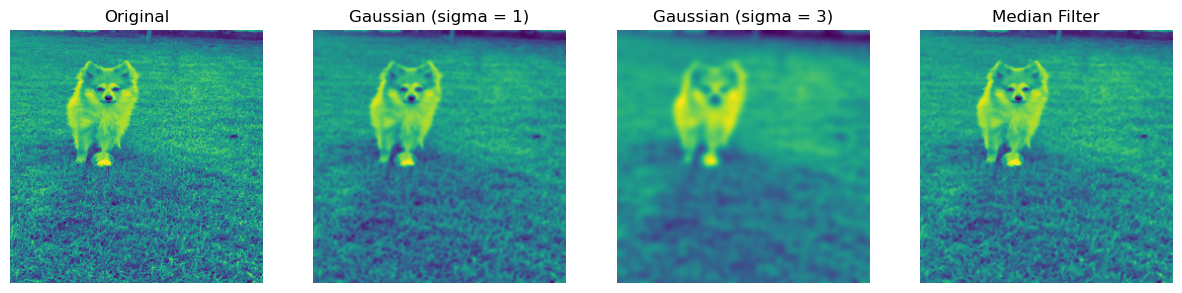

In [11]:

# Apply Gaussian kernel with sigma = 1
gaussian_filtered_1 = gaussian(rocki_gray, sigma=1)

# Apply Gaussian kernel with a different sigma value (e.g., sigma = 3)
gaussian_filtered_3 = gaussian(rocki_gray, sigma=3)

# Apply Median filter
median_filtered = median(rocki_gray)

# Display the images
images = [rocki_gray, gaussian_filtered_1, gaussian_filtered_3, median_filtered]
titles = ["Original", "Gaussian (sigma = 1)", "Gaussian (sigma = 3)", "Median Filter"]
viewFigure(images, titles)


b) **(Optional)** Apply the smoothing on some other images and present their results.

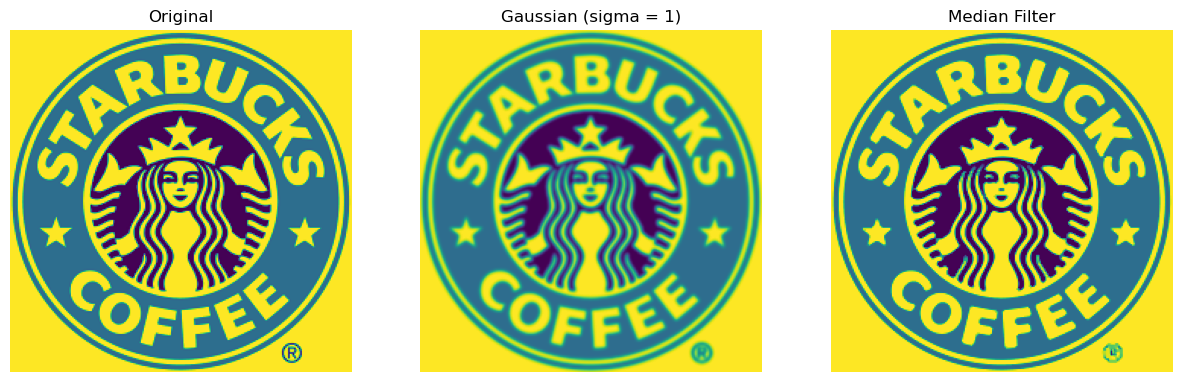

In [12]:
# Load the logo.png image
logo = io.imread('./images_notebook/logo.png')

# Extract the first three color channels (R, G, and B)
logo_rgb = logo[:, :, :3]

# Convert the color image to grayscale
logo_gray = rgb2gray(logo_rgb)

# Apply Gaussian filter with sigma = 1
gaussian_filtered_logo_1 = gaussian(logo_gray, sigma=1)

# Apply Median filter
median_filtered_logo = median(logo_gray)

# Display the images
images = [logo_gray, gaussian_filtered_logo_1, median_filtered_logo]
titles = ["Original", "Gaussian (sigma = 1)", "Median Filter"]
viewFigure(images, titles)

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

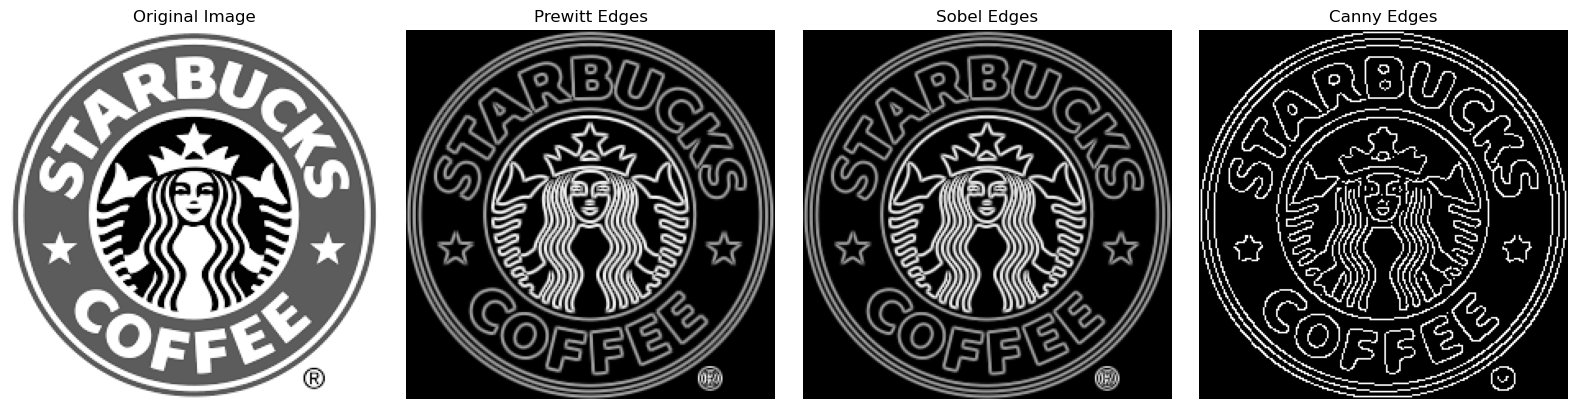

In [13]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""


# Load the 'logo.png' image
logo = io.imread('./images_notebook/logo.png', as_gray=True)  # Convert to grayscale

# Apply Prewitt edge detection
prewitt_edges = prewitt(logo)

# Apply Sobel edge detection
sobel_edges = sobel(logo)

# Apply Canny edge detection
canny_edges = canny(logo, sigma=2)  # Adjust the sigma parameter as needed

# Create subplots to visualize the results
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display the original image
axes[0].imshow(logo, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display Prewitt edges
axes[1].imshow(prewitt_edges, cmap='gray')
axes[1].set_title('Prewitt Edges')
axes[1].axis('off')

# Display Sobel edges
axes[2].imshow(sobel_edges, cmap='gray')
axes[2].set_title('Sobel Edges')
axes[2].axis('off')

# Display Canny edges
axes[3].imshow(canny_edges, cmap='gray')
axes[3].set_title('Canny Edges')
axes[3].axis('off')

plt.tight_layout()
plt.show()

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

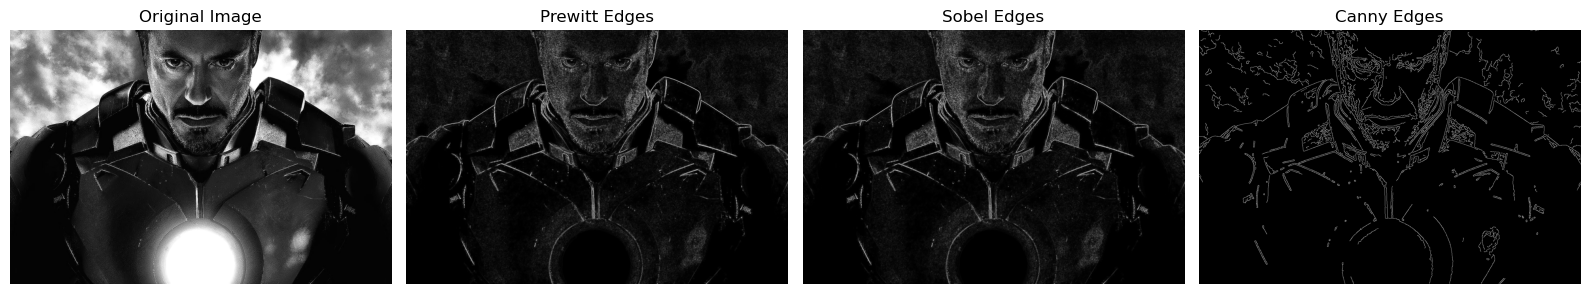

In [14]:
from skimage.io import imread
from skimage.filters import prewitt, sobel
from skimage.feature import canny

# Load a different image from the 'images' folder (replace 'image_path' with the actual path)
image = imread('./images_notebook/ironman.jpg', as_gray=True)  # Convert to grayscale

# Apply Prewitt edge detection
prewitt_edges = prewitt(image)

# Apply Sobel edge detection
sobel_edges = sobel(image)

# Apply Canny edge detection
canny_edges = canny(image, sigma=2)  # Adjust the sigma parameter as needed

# Create subplots to visualize the results
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display Prewitt edges
axes[1].imshow(prewitt_edges, cmap='gray')
axes[1].set_title('Prewitt Edges')
axes[1].axis('off')

# Display Sobel edges
axes[2].imshow(sobel_edges, cmap='gray')
axes[2].set_title('Sobel Edges')
axes[2].axis('off')

# Display Canny edges
axes[3].imshow(canny_edges, cmap='gray')
axes[3].set_title('Canny Edges')
axes[3].axis('off')

plt.tight_layout()
plt.show()

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


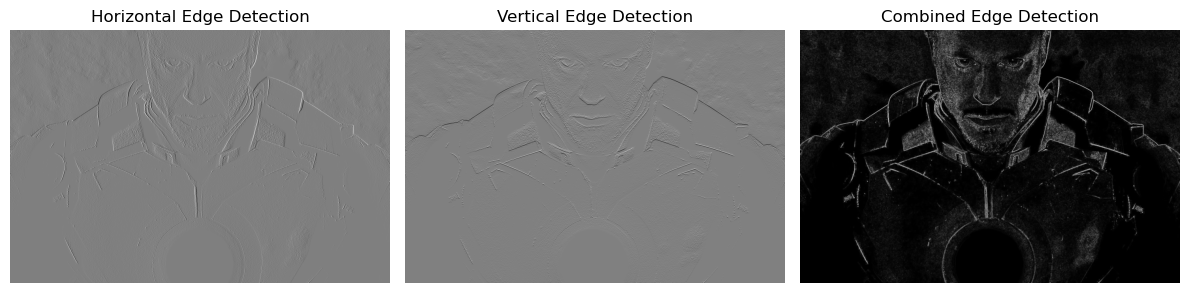

In [15]:
from skimage.filters import sobel
import matplotlib.pyplot as plt
from skimage import io, color

# Load the image
image = io.imread('./images_notebook/ironman.jpg')
gray_image = color.rgb2gray(image)  # Convert to grayscale

# Apply Sobel for horizontal edge detection
sobel_horizontal = sobel(gray_image, axis=1)

# Apply Sobel for vertical edge detection
sobel_vertical = sobel(gray_image, axis=0)

# Apply Sobel for combined horizontal and vertical edge detection
sobel_combined = sobel(gray_image)

# Plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(sobel_horizontal, cmap='gray')
plt.title('Horizontal Edge Detection')
plt.axis('off')

plt.subplot(132)
plt.imshow(sobel_vertical, cmap='gray')
plt.title('Vertical Edge Detection')
plt.axis('off')

plt.subplot(133)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Combined Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

In [16]:
capitain = img_as_float(io.imread('./images_notebook/Capitain_America.jpg'))
ironMan = img_as_float(io.imread('./images_notebook/Ironman.jpg'))

#Define lowPass and highPass images
capitainLowPass = filters.gaussian(capitain, 10)
capitainHighPass = capitain - capitainLowPass

ironManLowPass = filters.gaussian(ironMan, 10)
ironManHighPass = ironMan - ironManLowPass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


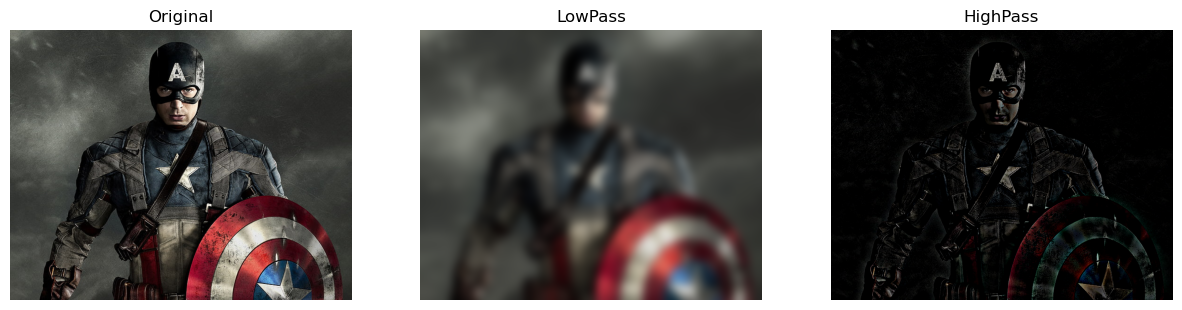

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


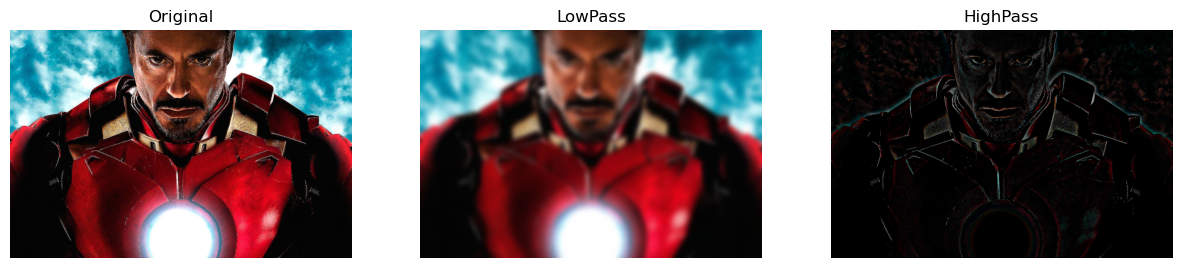

In [17]:
#Show images
imagesCapitain = [capitain, capitainLowPass,capitainHighPass]
imagesironMann = [ironMan, ironManLowPass,ironManHighPass]
titles = ['Original', 'LowPass', 'HighPass']
viewFigureGray(imagesCapitain, titles)
viewFigureGray(imagesironMann, titles)


b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


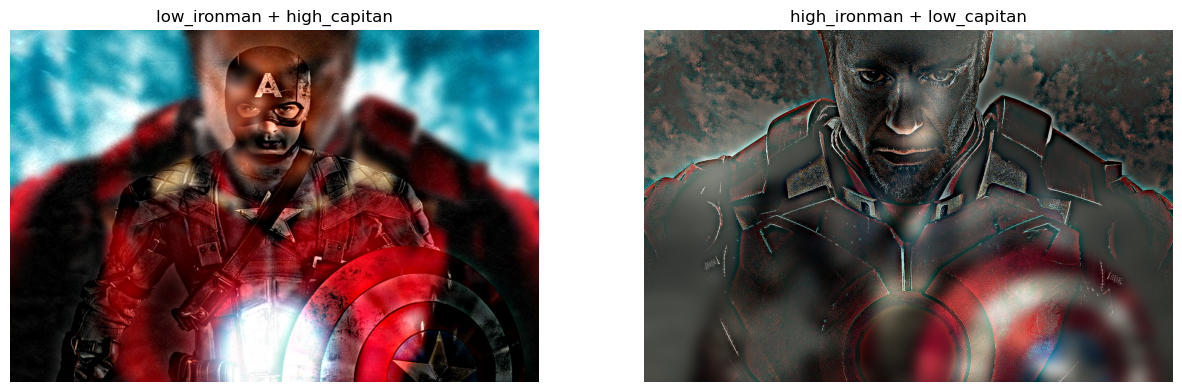

In [18]:
#your solution
capitainHighPass = resize(capitainHighPass, (1000,1500))
capitainLowPass = resize(capitainLowPass, (1000,1500))

capitainHybrid = ironManHighPass + capitainLowPass
ironManHybrid = capitainHighPass + ironManLowPass

#Show images
imagesHybrid = [ironManHybrid, capitainHybrid]
titles = ['low_ironman + high_capitan', 'high_ironman + low_capitan']
viewFigureGray(imagesHybrid, titles)

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames: 200
Images height: 180
Images width: 320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


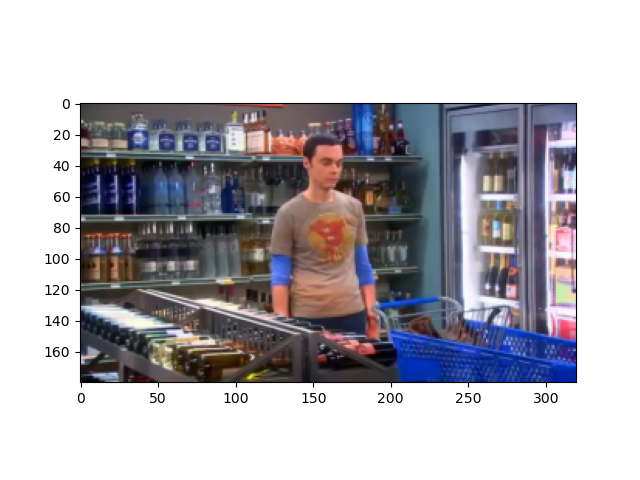

In [24]:
from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale = 0.5
frames = len(ic)
height = int(ic[0].shape[0] * scale)
width = int(ic[0].shape[1] * scale)

print('Info about the animation:')
print('Num Frames: ' + str(frames))
print('Images height: ' + str(height))
print('Images width: ' + str(width))

# Create a variable with dimensions of images by the number of frames
ic_small = np.ndarray(shape=(height, width, 3, frames))

# Combine them in ic_small variable
for i in range(frames):
    for channel in range(3):
        ic_small[:, :, channel, i] = transform.rescale(ic[i][:, :, channel], scale)

print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

%matplotlib nbagg

def updatefig1(i):
    im.set_array(ic_small[:, :, :, i])  # showing the small image
    plt.draw()
    return im

fig = plt.figure()
im = plt.imshow(ic_small[:, :, :, 0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat=False)
plt.show()


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import skimage
print(skimage.__version__)

0.20.0


In [27]:
!pip install --upgrade scikit-image==0.19.2

     ---------------------------------------- 0.0/22.2 MB ? eta -:--:--
     - -------------------------------------- 0.7/22.2 MB 14.8 MB/s eta 0:00:02
     - -------------------------------------- 1.0/22.2 MB 16.7 MB/s eta 0:00:02
     - -------------------------------------- 1.0/22.2 MB 16.7 MB/s eta 0:00:02
     --- ------------------------------------ 2.1/22.2 MB 12.1 MB/s eta 0:00:02
     --- ------------------------------------ 2.1/22.2 MB 12.1 MB/s eta 0:00:02
     --- ------------------------------------ 2.1/22.2 MB 12.1 MB/s eta 0:00:02
     --- ------------------------------------ 2.1/22.2 MB 12.1 MB/s eta 0:00:02
     --- ------------------------------------ 2.1/22.2 MB 12.1 MB/s eta 0:00:02
     --- ------------------------------------ 2.1/22.2 MB 12.1 MB/s eta 0:00:02
     --------- ------------------------------ 5.4/22.2 MB 11.5 MB/s eta 0:00:02
     --------------- ------------------------ 8.5/22.2 MB 16.4 MB/s eta 0:00:01
     ------------------ -------------------- 10.

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [961 lines of output]
  setup.py:9: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext as npy_build_ext
  Partial import of skimage during the build process.
  Compiling C:\Users\pedro\AppData\Local\Temp\pip-install-man662di\scikit-image_8b401233a9c34f98afd35ea93b567907\skimage\morphology\_skeletonize_3d_cy.pyx because it changed.
  [1/1] Cythonizing C:\Users\pedro\AppData\Local\Temp\pip-install-man662di\scikit-image_8b401233a9c34f98afd35ea93b567907\skimage\morphology\_skeletonize_3d_cy.pyx
  running bdist_wheel